In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from numpy import linalg as LN

## Activity 1:

### Hough Transform

In [2]:
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (3, 3), 1.5)

row = blur.shape[0]
circles = cv.HoughCircles(blur, cv.HOUGH_GRADIENT, 1, row/8, param1 = 300, param2 = 35)

#plot all circle
if circles is not None:
    circles = np.circles = np.uint8(np.around(circles))
    for i in circles[0]:
        #Draw circle center
        center = (i[0], i[1])
        cv.circle(img, center, 1,(100, 100, 255), 3)
        #draw the circle
        radius =  i[2]
        cv.circle(img, center, radius, (0, 255, 0), 2)
        
cv.imshow("hough circle transform", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Blob Detection

In [3]:
img = cv.imread('coins_1.jfif')
blur = cv.medianBlur(img, 3)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

#parameter settings
params = cv.SimpleBlobDetector_Params()

#set up the filters
params.filterByArea = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

#create object detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

#draw keypoints
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0, 0, 255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('Blobs', im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

### Comment on Hough Transform and Blob Detection
Comparing between both methods, Hough Transform showing us that it is easy to detect the object more accuracy. While the Blob Detection which involved a lots of settings in order to increase the accuracy of detection and this has increased the complexity of the code.

## Activity 2:

### 2 Helper

In [4]:
#Define 2 helper function: visualize the cluster membership
def centroid_histogram(clust_labels):
    # Create histogram based on the number of pixels assigned to each cluster
    numLabels = len(np.unique(clust_labels))
    hist, _ = np.histogram(clust_labels, bins = numLabels)
    
    # Normalize the histogram, such that it sums to one
    hist = hist.astype("float32")
    hist /= hist.sum()
    
    return hist

def plot_colors(hist, centroids):
    # Initialize bar chart representing relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = np.uint8)
    startX = 0
    
    # loop over the percentage of each cluster and the color of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent*300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
                    color.astype("uint8").tolist(), -1)
        startX = endX
        
    # return bar chart
    return bar

### Segmentation using BGR

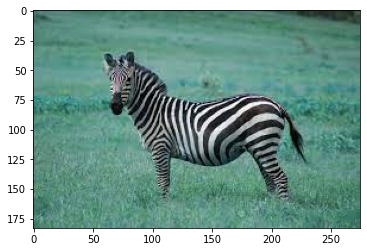

In [5]:
img = cv.imread('zebra.jfif')

plt.figure()
plt.imshow(img)
plt.show()

In [6]:
#reshape
img_reshape = img.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

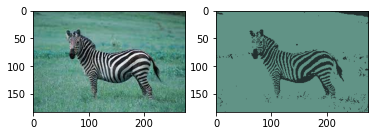

In [7]:
#k-clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
attempts = 10
ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

#reshape into original dimensions
center = np.uint8(center)
res = center[label.flatten()]
results = res.reshape(img.shape)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(results)
plt.show()

### Segmentation using HSV

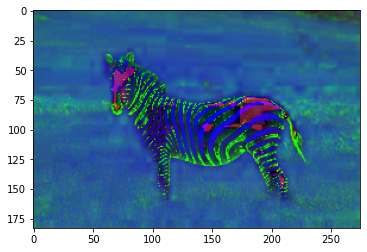

In [8]:
img = cv.imread('zebra.jfif')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img_hsv)
plt.show()

In [9]:
#reshape
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

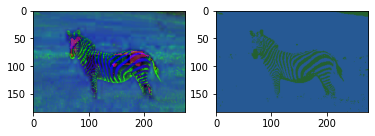

In [10]:
#k-clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
attempts = 10
ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

#reshape into original dimensions
center = np.uint8(center)
res = center[label.flatten()]
results = res.reshape(img_hsv.shape)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_hsv)
plt.subplot(1, 2, 2)
plt.imshow(results)
plt.show()